<a href="https://colab.research.google.com/github/Seemab-zakir/Cat_dog-Classification_keras/blob/main/cat_and_dog_assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
from keras.preprocessing import image
import os
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
from tensorflow.keras.applications import vgg16 
from keras.applications.vgg16 import preprocess_input
import numpy as np


In [3]:
import pandas as pd 
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

In [4]:
# path='/content/gdrive/MyDrive/dog_and_cat.zip'
!unzip /content/gdrive/MyDrive/dog_and_cat.zip

Archive:  /content/gdrive/MyDrive/dog_and_cat.zip
  inflating: dog_and_cat/cat.1.jpg   
  inflating: dog_and_cat/cat.10.jpg  
  inflating: dog_and_cat/cat.100.jpg  
  inflating: dog_and_cat/cat.101.jpg  
  inflating: dog_and_cat/cat.102.jpg  
  inflating: dog_and_cat/cat.103.jpg  
  inflating: dog_and_cat/cat.104.jpg  
  inflating: dog_and_cat/cat.106.jpg  
  inflating: dog_and_cat/cat.107.jpg  
  inflating: dog_and_cat/cat.108.jpg  
  inflating: dog_and_cat/cat.109.jpg  
  inflating: dog_and_cat/cat.11.jpg  
  inflating: dog_and_cat/cat.110.jpg  
  inflating: dog_and_cat/cat.111.jpg  
  inflating: dog_and_cat/cat.113.jpg  
  inflating: dog_and_cat/cat.114.jpg  
  inflating: dog_and_cat/cat.115.jpg  
  inflating: dog_and_cat/cat.116.jpg  
  inflating: dog_and_cat/cat.117.jpg  
  inflating: dog_and_cat/cat.118.jpg  
  inflating: dog_and_cat/cat.12.jpg  
  inflating: dog_and_cat/cat.120.jpg  
  inflating: dog_and_cat/cat.121.jpg  
  inflating: dog_and_cat/cat.122.jpg  
  inflating: dog_a

In [5]:
os.rename('dog_and_cat', 'dataset')

In [6]:
from sklearn.utils import shuffle
import random
filenames = os.listdir('/content/dataset')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append("dog")
    else:
        categories.append("cat")
    
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})


In [7]:
df.head()

,filename,category
0,dog.2767.jpg,dog
1,cat.146.jpg,cat
2,cat.446.jpg,cat
3,cat.93.jpg,cat
4,dog.370.jpg,dog


In [8]:
#!mkdir data


In [9]:
#!mkdir data/cats
#!mkdir data/dogs

In [10]:
import shutil
len(filenames)

1033

In [11]:
print(filenames)

['dog.2767.jpg', 'cat.146.jpg', 'cat.446.jpg', 'cat.93.jpg', 'dog.370.jpg', 'dog.387.jpg', 'cat.477.jpg', 'cat.229.jpg', 'cat.316.jpg', 'dog.2760.jpg', 'dog.395.jpg', 'cat.206.jpg', 'dog.436.jpg', 'dog.106.jpg', 'cat.577.jpg', 'dog.438.jpg', 'cat.226.jpg', 'dog.2761.jpg', 'cat.337.jpg', 'cat.309.jpg', 'dog.469.jpg', 'cat.260.jpg', 'cat.485.jpg', 'cat.136.jpg', 'cat.211.jpg', 'dog.409.jpg', 'cat.418.jpg', 'cat.74.jpg', 'dog.80.jpg', 'cat.242.jpg', 'dog.52.jpg', 'dog.269.jpg', 'cat.479.jpg', 'dog.434.jpg', 'dog.147.jpg', 'dog.413.jpg', 'dog.420.jpg', 'dog.247.jpg', 'cat.269.jpg', 'dog.2758.jpg', 'dog.25.jpg', 'cat.18.jpg', 'dog.270.jpg', 'cat.185.jpg', 'dog.280.jpg', 'cat.430.jpg', 'dog.2776.jpg', 'cat.349.jpg', 'cat.552.jpg', 'cat.202.jpg', 'cat.386.jpg', 'dog.81.jpg', 'dog.151.jpg', 'cat.580.jpg', 'dog.18.jpg', 'cat.303.jpg', 'dog.2792.jpg', 'dog.273.jpg', 'dog.514.jpg', 'cat.306.jpg', 'cat.251.jpg', 'dog.492.jpg', 'cat.466.jpg', 'dog.205.jpg', 'cat.50.jpg', 'cat.367.jpg', 'dog.296.jpg

In [12]:
#print(os.listdir("data"))

Prepare Traning Data

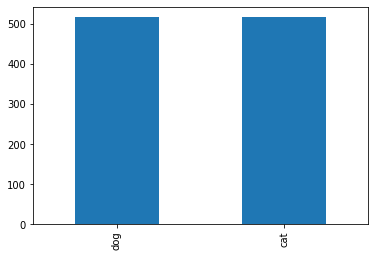

In [13]:
df['category'].value_counts().plot.bar()

In [14]:
#image size
image_shape = (224,224,3)

In [15]:
#filenames = np.asarray(filenames) #data are converted to an array
#category = np.asarray(category)

In [16]:
print(filenames)
print(categories)

['dog.2767.jpg', 'cat.146.jpg', 'cat.446.jpg', 'cat.93.jpg', 'dog.370.jpg', 'dog.387.jpg', 'cat.477.jpg', 'cat.229.jpg', 'cat.316.jpg', 'dog.2760.jpg', 'dog.395.jpg', 'cat.206.jpg', 'dog.436.jpg', 'dog.106.jpg', 'cat.577.jpg', 'dog.438.jpg', 'cat.226.jpg', 'dog.2761.jpg', 'cat.337.jpg', 'cat.309.jpg', 'dog.469.jpg', 'cat.260.jpg', 'cat.485.jpg', 'cat.136.jpg', 'cat.211.jpg', 'dog.409.jpg', 'cat.418.jpg', 'cat.74.jpg', 'dog.80.jpg', 'cat.242.jpg', 'dog.52.jpg', 'dog.269.jpg', 'cat.479.jpg', 'dog.434.jpg', 'dog.147.jpg', 'dog.413.jpg', 'dog.420.jpg', 'dog.247.jpg', 'cat.269.jpg', 'dog.2758.jpg', 'dog.25.jpg', 'cat.18.jpg', 'dog.270.jpg', 'cat.185.jpg', 'dog.280.jpg', 'cat.430.jpg', 'dog.2776.jpg', 'cat.349.jpg', 'cat.552.jpg', 'cat.202.jpg', 'cat.386.jpg', 'dog.81.jpg', 'dog.151.jpg', 'cat.580.jpg', 'dog.18.jpg', 'cat.303.jpg', 'dog.2792.jpg', 'dog.273.jpg', 'dog.514.jpg', 'cat.306.jpg', 'cat.251.jpg', 'dog.492.jpg', 'cat.466.jpg', 'dog.205.jpg', 'cat.50.jpg', 'cat.367.jpg', 'dog.296.jpg

In [17]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.15, random_state=42)
#split train in train-valid
trainVal_df, test_Valdf = train_test_split(train_df, test_size=0.15, random_state=42)



In [18]:
from keras_preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
    horizontal_flip=True,
    # vertical_flip=True,
    # rotation_range=90,
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # zoom_range=.1,
    rescale=1/255,
    fill_mode='nearest',
    # shear_range=0.1,
    # brightness_range=[0.8, 1.2]
    )
   
    
    

In [19]:
len(train_df),len(test_df)

(878, 155)

In [20]:
train_df

,filename,category
535,cat.39.jpg,cat
956,dog.2824.jpg,dog
323,cat.61.jpg,cat
882,dog.491.jpg,dog
890,dog.398.jpg,dog
...,...,...
87,cat.501.jpg,cat
330,cat.324.jpg,cat
466,cat.345.jpg,cat
121,cat.352.jpg,cat


data augmentation

In [21]:
train_generator = datagen.flow_from_dataframe(dataframe=train_df,directory='/content/dataset',
    x_col="filename",
    y_col="category",
    target_size=image_shape[0:2],
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

Found 878 validated image filenames belonging to 2 classes.


In [22]:
val_generator = datagen.flow_from_dataframe(dataframe=trainVal_df,directory='/content/dataset',
    x_col="filename",
    y_col="category",
    target_size=image_shape[0:2],
    batch_size=32,
    class_mode='categorical'
    )

Found 746 validated image filenames belonging to 2 classes.


In [23]:
test_generator = datagen.flow_from_dataframe(dataframe=test_df,directory='/content/dataset',
    x_col="filename",
    y_col="category",
    target_size=image_shape[0:2],
    batch_size=32,
    class_mode='categorical',
    shuffle=False
    )

Found 155 validated image filenames belonging to 2 classes.


Model

In [24]:
from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers, Sequential,Model
from keras import optimizers

vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#Freeze the layers 
for layer in vgg_conv.layers:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

58889256/58889256 [==============================] - 2s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f20a2e077f0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f20a32b97c0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f20a33ea190> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f20a2d72d90> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f20a2d72fa0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2093c37040> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f20a2d72d00> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2093c3faf0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2093c37eb0> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2093c47b80> False
<keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f2093c3ff10> False
<keras.layers.convolutional.conv2d.Conv2D object at 0x7f2093c37f70> False
<keras.layers.convolutional.con

In [25]:
model = Sequential() #A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
model.add(vgg_conv)
          
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))







In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 1

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [99]:
results = model.fit(train_generator,epochs=20,
                              validation_data=test_generator,verbose=1)

Epoch 1/20
28/28 [==============================] - 6s 196ms/step - loss: 0.7194 - accuracy: 0.7961 - val_loss: 0.3198 - val_accuracy: 0.8452
Epoch 2/20
28/28 [==============================] - 5s 191ms/step - loss: 0.2847 - accuracy: 0.8838 - val_loss: 0.3229 - val_accuracy: 0.8645
Epoch 3/20
28/28 [==============================] - 5s 194ms/step - loss: 0.2649 - accuracy: 0.8929 - val_loss: 0.3997 - val_accuracy: 0.8581
Epoch 4/20
28/28 [==============================] - 6s 194ms/step - loss: 0.1653 - accuracy: 0.9271 - val_loss: 0.2877 - val_accuracy: 0.8710
Epoch 5/20
28/28 [==============================] - 6s 197ms/step - loss: 0.1596 - accuracy: 0.9385 - val_loss: 0.2577 - val_accuracy: 0.8839
Epoch 6/20
28/28 [==============================] - 6s 219ms/step - loss: 0.1425 - accuracy: 0.9476 - val_loss: 0.2690 - val_accuracy: 0.8968
Epoch 7/20
28/28 [==============================] - 6s 213ms/step - loss: 0.1010 - accuracy: 0.9613 - val_loss: 0.3295 - val_accuracy: 0.8710
Epoch 

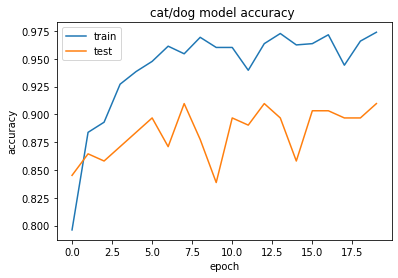

In [100]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('cat/dog model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

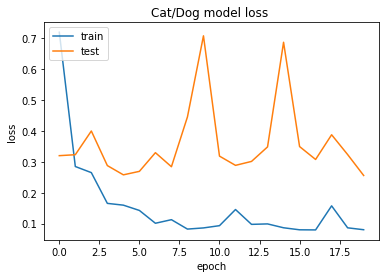

In [101]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Cat/Dog model loss ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [102]:
model.evaluate(test_generator)

5/5 [==============================] - 1s 158ms/step - loss: 0.2663 - accuracy: 0.9032


[0.26629215478897095, 0.9032257795333862]

In [103]:
model.evaluate(val_generator)

24/24 [==============================] - 4s 159ms/step - loss: 0.0193 - accuracy: 0.9973


[0.01928907260298729, 0.9973190426826477]

In [104]:
!mkdir results

mkdir: cannot create directory ‘results’: File exists


In [105]:
# to save model and weights

model_json = model.to_json()
with open("results/model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('results/model_weights.h5')

In [106]:
#y_test[0:10],y_pred[0:10]

In [107]:
y_score=model.predict(test_generator)



5/5 [==============================] - 1s 155ms/step


In [108]:
class_names=list(test_generator.class_indices.values())
class_names

[0, 1]

In [109]:
print(y_score.shape)
y_pred=np.argmax(y_score,axis=1)#return col which has max value
y_test=test_generator.classes#axis 0=rows and axis 1=col


(155, 2)


In [110]:
np.unique(y_pred,return_counts=True)

(array([0, 1]), array([73, 82]))

In [111]:
test_generator.classes

[0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0]

In [112]:
from sklearn.metrics import classification_report,accuracy_score,f1_score
print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='macro'))

0.896774193548387
0.8962516733601071


In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        71
           1       0.91      0.89      0.90        84

    accuracy                           0.90       155
   macro avg       0.90      0.90      0.90       155
weighted avg       0.90      0.90      0.90       155



In [114]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filenames):
   np_image = Image.open(filenames)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (224, 224))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image
image = load('/content/dataset/dog.175.jpg')
img=np.argmax(model.predict(image),1)
image2=load('/content/dataset/cat.101.jpg')
img2=np.argmax(model.predict(image2),1)


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


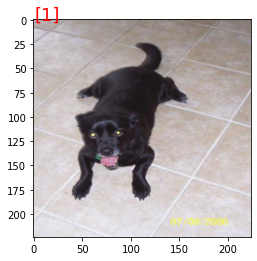

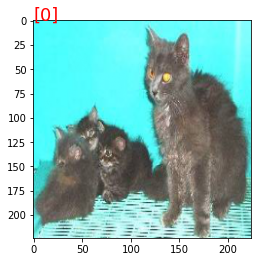

In [115]:
from skimage import io
# Load the image
org_img = io.imread('/content/dataset/dog.175.jpg')
org_img = transform.resize(org_img, (224, 224))
plt.imshow(org_img)
plt.text(0.5, 0.5, img, fontsize=18, color='red')
plt.show()


# Load the image
org_img2 = io.imread('/content/dataset/cat.101.jpg')
org_img2 = transform.resize(org_img2, (224, 224))
plt.imshow(org_img2)
plt.text(0, 0, img2, fontsize=18, color='red')
plt.show()

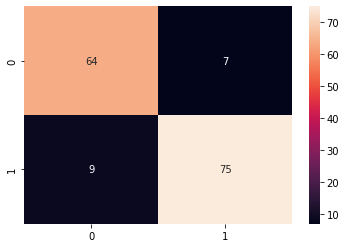

In [116]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=list(class_names))
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               #display_labels=list(class_names))
sns.heatmap(cm, annot=True, fmt="d")
#disp.plot(cmap='Blues')
plt.show()

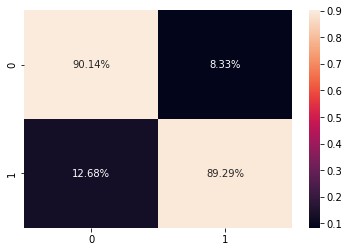

In [117]:
cm = cm.astype('float') / cm.sum(axis=1)
sns.heatmap(cm, annot=True, 
            fmt='.2%')